In [1]:
# Data handling
import pandas as pd
import numpy as np

# Text processing
import re
import unicodedata
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Train-test split
from sklearn.model_selection import train_test_split

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
import xgboost as xgb

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)


In [106]:
# loading data set into data frame
data = pd.read_csv(r"C:\Users\traik\Desktop\ML_Bootcamp\Week7\Project_Week7\cfenollosa-project-3-nlp-6d8a37b\dataset\training_data.csv",sep="\t",header = None)

In [107]:
# checking the data frame
data.head()

,0,1
0,0,donald trump sends out embarrassing new year‚s eve message; this is disturbing
1,0,drunk bragging trump staffer started russian collusion investigation
2,0,sheriff david clarke becomes an internet joke for threatening to poke people ‚in the eye‚
3,0,trump is so obsessed he even has obama‚s name coded into his website (images)
4,0,pope francis just called out donald trump during his christmas speech


In [ ]:
# data frame shape
data.shape

(34152, 2)

In [5]:
data.tail()

,0,1
34147,1,tears in rain as thais gather for late king's ...
34148,1,pyongyang university needs non-u.s. teachers a...
34149,1,philippine president duterte to visit japan ah...
34150,1,japan's abe may have won election\tbut many do...
34151,1,demoralized and divided: inside catalonia's po...


In [ ]:
# setting inices
data.set_index=True

In [108]:
# setting column names
data.columns=["label","Text"]

In [8]:
data.head()

,label,Text
0,0,donald trump sends out embarrassing new year‚s...
1,0,drunk bragging trump staffer started russian c...
2,0,sheriff david clarke becomes an internet joke ...
3,0,trump is so obsessed he even has obama‚s name ...
4,0,pope francis just called out donald trump duri...


In [ ]:
# checking for missing data
data.isna().sum()

label    0
Text     0
dtype: int64

In [10]:
# no data missing

### Evaluation Function

In [ ]:
# defining function that fits models and evaluetes them

In [11]:
# list to store all models scores
results = []   
# evaluation function 
def evaluate_model(name, vectorizer, classifier, X_train_raw, y_train, X_test_raw, y_test):
    # Vectorize
    X_train = vectorizer.fit_transform(X_train_raw)
    X_test = vectorizer.transform(X_test_raw)
    
    # Train
    classifier.fit(X_train, y_train)
    
    # Predict
    preds = classifier.predict(X_test)
    
    # Evaluate
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    
    # Append results
    results.append({
        "model": name,
        "accuracy": acc,
        "f1_score": f1
    })

    
def show_results():
    return pd.DataFrame(results).sort_values("f1_score", ascending=False)


def save_table(filename="results.csv"):
    df = show_results()
    df.to_csv(filename, index=False)
    print(f"Saved table to {filename}")



### Data Cleaning

In [109]:
data["data_clean"] = data["Text"]

In [110]:
data["data_no_punc"] = data["Text"]

In [14]:
import re

In [111]:
# replacing slurs in original text
CENSORED_PATTERN = re.compile(
    r'(?<!\w)'          # word start -> prev char is not a word char, e.g. space
    r'(?=\w*[A-Za-z])'  # word must contain at least one letter
    r'\w*[*]+'          # any letters with one or more *-chars
    r'\w*'              # optional letters after *-char
    r'(?!\w)',          # word end -> next char is not a word char, e.g. space
    flags=re.UNICODE
)

In [113]:

# cleaning the data but keeping punctuation
def preprocess_text(text):
    if pd.isnull(text):
        return ""
    
    # lower case
    text = text.lower()

    # normalie punctuation
    text = unicodedata.normalize("NFKC", text)

    #replace censored words
    text = CENSORED_PATTERN.sub('censored_slur', text)

    # remove extra white space
    ext = re.sub(r'\s+', ' ', text).strip()

    return text

In [114]:
# cleaning the data with no punctuation


def preprocess_text_no_punc(text):
    if pd.isnull(text):
        return ""
    
    # lower case
    text = text.lower()

    # normalize unicode characters
    text = unicodedata.normalize("NFKC", text)

    # replace censored words (your existing pattern)
    text = CENSORED_PATTERN.sub('censored_slur', text)

    # remove ALL punctuation
    text = re.sub(r"[^\w\s]", "", text)

    # remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()

    return text


In [ ]:
# creating 2 new columns with cleaned data. 1 column with punctuation and the other without.

In [115]:
data["data_clean"] = data["data_clean"].apply(preprocess_text)

In [116]:
data["data_no_punc"] = data["data_no_punc"].apply(preprocess_text_no_punc)

In [117]:
print(data.iloc[9])


label                                                                                             0
Text                      brand-new pro-trump ad features so much a** kissing it will make you sick
data_clean      brand-new pro-trump ad features so much censored_slur kissing it will make you sick
data_no_punc      brandnew protrump ad features so much censored_slur kissing it will make you sick
Name: 9, dtype: object


In [24]:
import pandas as pd

pd.set_option('display.max_colwidth', None)


In [25]:
import matplotlib.pyplot as plt


In [ ]:
# splitting data into train and test sets before introducing verctorizing.


In [26]:
# splitting clean data with punctuation
X_train,X_test,y_train,y_test = train_test_split(data["data_clean"],data["label"],test_size=0.2,random_state=42)

In [27]:
# splitting clean data with no punctuation

X_train_no_punc,X_test_no_punc,y_train_no_punc,y_test_no_punc = train_test_split(data["data_no_punc"],data["label"],test_size=0.2,random_state=42)

In [28]:
# splitting cleaned data and ermoving headlines with less than 3 words

X_train_headline,X_test_headline,y_train_headline,y_test_headline = train_test_split(data["data_headlines"],data["label"],test_size=0.2,random_state=42)

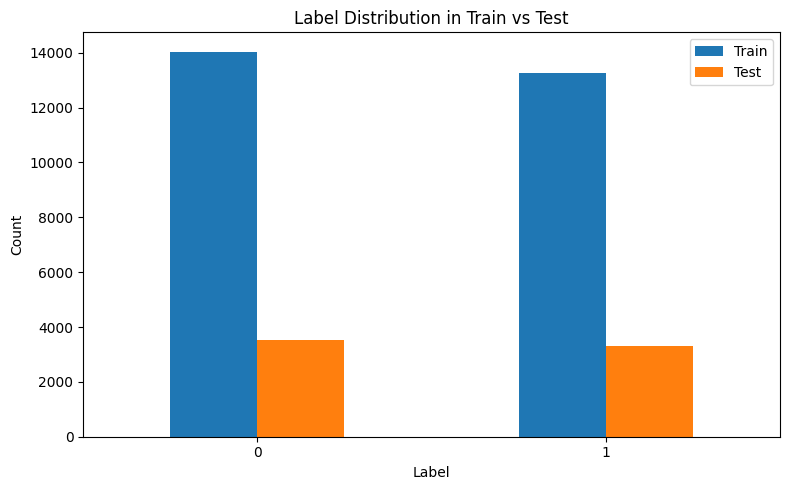

In [29]:
# Get value counts
train_counts = y_train.value_counts().sort_index()
test_counts = y_test.value_counts().sort_index()

# Combine into DataFrame
df_plot = pd.DataFrame({
    "Train": train_counts,
    "Test": test_counts
}).fillna(0)

# Plot
ax = df_plot.plot(kind="bar", figsize=(8,5))
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Label Distribution in Train vs Test")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Stemming, Lemmatizing, Stopwords

In [30]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

stop_words = set(stopwords.words("english"))
stemmer = SnowballStemmer("english")

def stem_and_stopwords(text):
    if pd.isnull(text):
        return ""
    
    words = text.split()
    processed = [
        stemmer.stem(word)
        for word in words
        if word not in stop_words
    ]

    return " ".join(processed)


In [ ]:
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def lemmatize_and_stopwords(text):
    if pd.isnull(text):
        return ""
    
    words = text.split()
    processed = [
        lemmatizer.lemmatize(word)
        for word in words
        if word not in stop_words
    ]
    
    return " ".join(processed)


In [ ]:
stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    if pd.isnull(text):
        return ""
    
    words = text.split()
    filtered = [word for word in words if word not in stop_words]
    return " ".join(filtered)


In [ ]:
# creating different training and testing sets to fit and evaluate the modes

In [33]:
X_train_stemming = X_train.apply(stem_and_stopwords)
X_test_stemming = X_test.apply(stem_and_stopwords)

In [34]:
X_train_lemm = X_train.apply(lemmatize_and_stopwords)
X_test_lemm = X_test.apply(lemmatize_and_stopwords)

In [36]:
X_train_stop_words = X_train.apply(remove_stopwords)
X_test_stop_words = X_test.apply(remove_stopwords)

In [37]:
X_train_stop_words[9]

'brand-new pro-trump ad features much censored_slur kissing make sick'

# Models

In [ ]:
# vectorizing data with tf-idf

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

testing on default hyper-parameters Logistic Regression and XGBoost

In [39]:
from sklearn.linear_model import LogisticRegression


In [40]:
lr = LogisticRegression()

In [41]:
lr.fit(X_train_tfidf,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [42]:
# 1. Make predictions
y_pred = lr.predict(X_test_tfidf)

# 2. Basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# 3. Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 4. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Accuracy: 0.9456887717757283
Precision: 0.9459822648234273
Recall: 0.9456887717757283
F1 Score: 0.945702542518447

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3529
           1       0.93      0.96      0.94      3302

    accuracy                           0.95      6831
   macro avg       0.95      0.95      0.95      6831
weighted avg       0.95      0.95      0.95      6831


Confusion Matrix:
[[3303  226]
 [ 145 3157]]


In [43]:
import xgboost
from xgboost import XGBClassifier

In [44]:
xg = XGBClassifier(random_state=42)

In [45]:
xg.fit(X_train_tfidf,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [46]:

y_pred = xg.predict(X_test_tfidf)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Accuracy: 0.919631093544137
Precision: 0.9222905582059041
Recall: 0.919631093544137
F1 Score: 0.9196158090991897

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      3529
           1       0.89      0.96      0.92      3302

    accuracy                           0.92      6831
   macro avg       0.92      0.92      0.92      6831
weighted avg       0.92      0.92      0.92      6831


Confusion Matrix:
[[3124  405]
 [ 144 3158]]


# Defining Models for the experiment

In [47]:
# RandomForestClassifier
rf_baseline = RandomForestClassifier(
    n_estimators=200,
    max_depth=50,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)


In [48]:
# Logistic Regression
logreg_baseline = LogisticRegression(
    max_iter=2000,       
    solver='lbfgs',      
    class_weight='balanced',
    random_state=42
)



In [49]:
# SVM 
svm_baseline = LinearSVC(
    max_iter=5000,
    class_weight='balanced',
    random_state=42
)


In [50]:
# MNB
mnb_baseline = MultinomialNB(
    alpha=1.0,  
)


In [51]:
# xgb
xgb_baseline = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

## Evaluating the model

In [52]:
# Clear previous results
results.clear()

# Call your evaluation function for all models

evaluate_model("Random Forest + TF-IDF", tfidf, rf_baseline,
               X_train, y_train, X_test, y_test)

evaluate_model("Logistic Regression + TF-IDF", tfidf, logreg_baseline,
               X_train, y_train, X_test, y_test)

evaluate_model("Linear SVM + TF-IDF", tfidf, svm_baseline,
               X_train, y_train, X_test, y_test)

evaluate_model("Multinomial NB + TF-IDF", tfidf, mnb_baseline,
               X_train, y_train, X_test, y_test)

evaluate_model("XGBoost + TF-IDF", tfidf, xgb_baseline,
               X_train, y_train, X_test, y_test)



c:\Users\traik\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:15:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [53]:
show_results()
#save_table(filename="results_with_only_pre_process.csv")

,model,accuracy,f1_score
2,Linear SVM + TF-IDF,0.951105,0.949805
1,Logistic Regression + TF-IDF,0.944371,0.943351
3,Multinomial NB + TF-IDF,0.940272,0.937289
0,Random Forest + TF-IDF,0.916996,0.917069
4,XGBoost + TF-IDF,0.912165,0.913194


In [54]:
# Clear previous results
results.clear()

# Call your evaluation function for all models

evaluate_model("Random Forest + TF-IDF", tfidf, rf_baseline,
               X_train_lemm, y_train, X_test_lemm, y_test)

evaluate_model("Logistic Regression + TF-IDF", tfidf, logreg_baseline,
               X_train_lemm, y_train, X_test_lemm, y_test)

evaluate_model("Linear SVM + TF-IDF", tfidf, svm_baseline,
               X_train_lemm, y_train, X_test_lemm, y_test)

evaluate_model("Multinomial NB + TF-IDF", tfidf, mnb_baseline,
               X_train_lemm, y_train, X_test_lemm, y_test)

evaluate_model("XGBoost + TF-IDF", tfidf, xgb_baseline,
               X_train_lemm, y_train, X_test_lemm, y_test)

show_results()

#save_table(filename="results_lemming.csv")

c:\Users\traik\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:15:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,model,accuracy,f1_score
2,Linear SVM + TF-IDF,0.940565,0.938947
1,Logistic Regression + TF-IDF,0.934709,0.933234
3,Multinomial NB + TF-IDF,0.931489,0.928659
0,Random Forest + TF-IDF,0.900454,0.900235
4,XGBoost + TF-IDF,0.879813,0.883892


In [55]:
# evaluating models on cleaned data with no punctuation

# Clear previous results
results.clear()

# Call your evaluation function for all models

evaluate_model("Random Forest + TF-IDF", tfidf, rf_baseline,
               X_train_no_punc, y_train, X_test_no_punc, y_test)

evaluate_model("Logistic Regression + TF-IDF", tfidf, logreg_baseline,
               X_train_no_punc, y_train, X_test_no_punc, y_test)

evaluate_model("Linear SVM + TF-IDF", tfidf, svm_baseline,
               X_train_no_punc, y_train, X_test_no_punc, y_test)

evaluate_model("Multinomial NB + TF-IDF", tfidf, mnb_baseline,
               X_train_no_punc, y_train, X_test_no_punc, y_test)

evaluate_model("XGBoost + TF-IDF", tfidf, xgb_baseline,
               X_train_no_punc, y_train, X_test_no_punc, y_test)

show_results()

#save_table(filename="results_no_punc.csv")

c:\Users\traik\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:16:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,model,accuracy,f1_score
2,Linear SVM + TF-IDF,0.949495,0.947940
1,Logistic Regression + TF-IDF,0.946128,0.944910
3,Multinomial NB + TF-IDF,0.941443,0.938650
0,Random Forest + TF-IDF,0.918021,0.918033
4,XGBoost + TF-IDF,0.907920,0.909065


In [56]:
print("X_train_stop_words:", len(X_train_stop_words))
print("y_train:", len(y_train))

print("X_test_stop_words:", len(X_test_stop_words))
print("y_test:", len(y_test))


X_train_stop_words: 27321
y_train: 27321
X_test_stop_words: 6831
y_test: 6831


In [57]:
# with punctuation with no stop_words


# Clear previous results
results.clear()

# Call your evaluation function for all models

evaluate_model("Random Forest + TF-IDF", tfidf, rf_baseline,
               X_train_stop_words, y_train, X_test_stop_words, y_test)

evaluate_model("Logistic Regression + TF-IDF", tfidf, logreg_baseline,
               X_train_stop_words, y_train, X_test_stop_words, y_test)

evaluate_model("Linear SVM + TF-IDF", tfidf, svm_baseline,
               X_train_stop_words, y_train, X_test_stop_words, y_test)

evaluate_model("Multinomial NB + TF-IDF", tfidf, mnb_baseline,
               X_train_stop_words, y_train, X_test_stop_words, y_test)

evaluate_model("XGBoost + TF-IDF", tfidf, xgb_baseline,
               X_train_stop_words, y_train, X_test_stop_words, y_test)

show_results()

#save_table(filename="results_only_stop_words.csv")

c:\Users\traik\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:17:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,model,accuracy,f1_score
2,Linear SVM + TF-IDF,0.943786,0.942081
1,Logistic Regression + TF-IDF,0.936173,0.934828
3,Multinomial NB + TF-IDF,0.933245,0.930233
0,Random Forest + TF-IDF,0.898697,0.899067
4,XGBoost + TF-IDF,0.876299,0.880734


### Binary Vecotization

In [58]:
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=30000) # setting tfidf to binary


In [59]:
# Clear previous results
results.clear()

# Call your evaluation function for all models

evaluate_model("Random Forest + TF-IDF", tfidf, rf_baseline,
               X_train, y_train, X_test, y_test)

evaluate_model("Logistic Regression + TF-IDF", tfidf, logreg_baseline,
               X_train, y_train, X_test, y_test)

evaluate_model("Linear SVM + TF-IDF", tfidf, svm_baseline,
               X_train, y_train, X_test, y_test)

evaluate_model("Multinomial NB + TF-IDF", tfidf, mnb_baseline,
               X_train, y_train, X_test, y_test)

evaluate_model("XGBoost + TF-IDF", tfidf, xgb_baseline,
               X_train, y_train, X_test, y_test)
show_results()

#save_table("results_binary.csv")

c:\Users\traik\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:17:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,model,accuracy,f1_score
2,Linear SVM + TF-IDF,0.955643,0.954278
1,Logistic Regression + TF-IDF,0.946714,0.945639
3,Multinomial NB + TF-IDF,0.942322,0.939939
0,Random Forest + TF-IDF,0.911872,0.913081
4,XGBoost + TF-IDF,0.903821,0.906370


### Vectorizing in characters

In [60]:
tfidf_char = TfidfVectorizer(analyzer="char", ngram_range=(3,5)) # testing tfidf on character


In [61]:
# Clear previous results
results.clear()

# Call your evaluation function for all models



evaluate_model("Linear SVM + TF-IDF", tfidf_char, svm_baseline,
               X_train, y_train, X_test, y_test)

show_results()


,model,accuracy,f1_score
0,Linear SVM + TF-IDF,0.970575,0.969724


In [62]:

tfidf_char = TfidfVectorizer(analyzer="char", ngram_range=(3,5), max_features=100000) # testing tfidf on character with features limit


In [63]:
# Clear previous results
results.clear()

# Call your evaluation function for all models
svm_baseline


evaluate_model("Linear SVM + TF-IDF", tfidf_char, svm_baseline,
               X_train, y_train, X_test, y_test)

show_results()


,model,accuracy,f1_score
0,Linear SVM + TF-IDF,0.970722,0.96987


In [64]:
tfidf_char = TfidfVectorizer(analyzer="char", ngram_range=(2,5), max_features=100000) # testing tfidf on character with features limit


In [65]:
# tfidf_char increases performance significatly.
#  hyper-tune c parameter with grid sesarch 

### Grid-search for best c parameter and best ngram character range

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
tfidf = TfidfVectorizer(analyzer="char", ngram_range=(3,5), max_features=100000)
X_train_tfidf_svm = tfidf.fit_transform(X_train)
X_test_tfidf_svm  = tfidf.transform(X_test)

In [68]:
param_grid = {
    "C": [0.1, 0.2, 0.3, 0.4, 0.5,1]
}

In [69]:
svm = LinearSVC(class_weight="balanced", max_iter=5000, random_state=42)


In [70]:
grid_search = GridSearchCV(
    svm,
    param_grid=param_grid,
    scoring="f1_weighted",   # best metric for multi-class text
    cv=5,                    # 5-fold cross-validation
    n_jobs=-1,               # use all CPU cores
    verbose=2                # show progress
)


In [71]:
grid_search.fit(X_train_tfidf_svm,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


,estimator,LinearSVC(cla...ndom_state=42)
,param_grid,"{'C': [0.1, 0.2, ...]}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [72]:
print("Best C value:", grid_search.best_params_["C"])
print("Best CV F1 score:", grid_search.best_score_)

best_svm = grid_search.best_estimator_


Best C value: 0.5
Best CV F1 score: 0.9637700043711863


In [73]:
y_pred = best_svm.predict(X_test_tfidf_svm)

from sklearn.metrics import accuracy_score, f1_score, classification_report

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test F1 Score:", f1_score(y_test, y_pred, average="weighted"))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.9699897525984482
Test F1 Score: 0.9699951972867695

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      3529
           1       0.96      0.98      0.97      3302

    accuracy                           0.97      6831
   macro avg       0.97      0.97      0.97      6831
weighted avg       0.97      0.97      0.97      6831



In [74]:
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='char')),
    ('svm', LinearSVC(C=0.5, class_weight='balanced', random_state=42))
])


In [75]:
param_grid = {
    'tfidf__ngram_range': [(2,5), (3,5), (3,6), (4,7), (5,8)],
}


In [76]:
grid = GridSearchCV(
    pipeline,
    param_grid,
    scoring='f1_weighted',
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'tfidf__ngram_range': [(2, ...), (3, ...), ...]}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,input,'content'


In [77]:
print("Best ngram_range:", grid.best_params_['tfidf__ngram_range'])
print("Best CV score:", grid.best_score_)

best_model = grid.best_estimator_

# Evaluate on test set
y_pred = best_model.predict(X_test)
print("Test F1:", f1_score(y_test, y_pred, average='weighted'))
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Best ngram_range: (2, 5)
Best CV score: 0.9652338572455359
Test F1: 0.9718975251470043
Test Accuracy: 0.9718928414580589


### removing headlines with less than 4 words

In [79]:
mask_train = X_train_headline.str.split().str.len() >= 3
train_text_filtered = X_train_headline[mask_train]
y_train_filtered = y_train_headline[mask_train]
mask_test = X_test_headline.str.split().str.len() >= 3
test_text_filtered = X_test_headline[mask_test]
y_test_filtered = y_test_headline[mask_test]

In [80]:
tfidf_char = TfidfVectorizer(analyzer="char", ngram_range=(2,5)) # testing tfidf on character with features limit


In [81]:
# Clear previous results
results.clear()

# Call your evaluation function for all models
svm_baseline


evaluate_model("Linear SVM + TF-IDF", tfidf_char, svm_baseline,
               train_text_filtered, y_train_filtered, test_text_filtered, y_test_filtered)

show_results()

,model,accuracy,f1_score
0,Linear SVM + TF-IDF,0.972818,0.972134


In [82]:
import joblib

joblib.dump(svm_baseline, "best_perf_model.pkl")


['best_perf_model.pkl']

In [83]:
text_sample = "Bibi Netanjahu promissed he will kill himself if an influencer's post reaches 10000 likes"


In [84]:

loaded_model = joblib.load("best_perf_model.pkl")


In [85]:
vectorizer = tfidf_char


In [86]:
testing = {
    "headline": [
        # Fake (0)
        "shocked parents revolt after school secretly replaces pledge of allegiance with 'world oath' pushed by global elites",
        "breaking: cnn host caught on hot mic admitting network 'creates stories' to damage president — whistleblower drops bombshell",
        "outrage! california city bans american flag at public events to avoid 'offending newcomers' — residents furious",
        "look: antifa members riot again after conservative speaker announces surprise campus visit — chaos erupts",
        "hollywood actor claims he was 'blacklisted' for supporting trump — says studios run by radical left insiders",
        # Real (1)
        "u.s. senate panel advances bipartisan border security bill despite party divisions",
        "world health organization urges nations to expand vaccine access as cases rise globally",
        "federal reserve signals no rate change amid concerns over slowing economic growth",
        "european union agrees on new data-sharing rules after months of negotiations",
        "canadian prime minister announces inquiry into nationwide cyberattack on government services"
    ],
    "label": [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
}

small_test = pd.DataFrame(testing)

# Transform only the headline column
X_test_small = vectorizer.transform(small_test["headline"])

# Predict
pred = loaded_model.predict(X_test_small)

# Evaluation
y_true = small_test["label"]
y_pred = pred

print("Accuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10


Confusion Matrix:
 [[5 0]
 [0 5]]


In [87]:
text_sample_1=["Trump promises to lick my ass"]

In [88]:
X_new_1 = vectorizer.transform(text_sample_1)
prediction_1 = loaded_model.predict(X_new_1)
print(prediction_1)

[1]


### Loading testing set with no labels and filling in predictions from Model in data frame

In [89]:
df_new = pd.read_csv(r"C:\Users\traik\Desktop\ML_Bootcamp\Week7\Project_Week7\cfenollosa-project-3-nlp-6d8a37b\dataset\testing_data.csv",sep="\t",header=None)

In [90]:
df_new.head()

,0,1
0,2,copycat muslim terrorist arrested with assault weapons
1,2,wow! chicago protester caught on camera admits violent activity was pre-planned: ‚it‚s not gonna be peaceful‚
2,2,germany's fdp look to fill schaeuble's big shoes
3,2,mi school sends welcome back packet warning kids against wearing u.s. flag to school
4,2,u.n. seeks 'massive' aid boost amid rohingya 'emergency within an emergency'


In [91]:
df_new.columns

Index([0, 1], dtype='int64')

In [92]:
df_new.columns = ["0","headlines"]

In [93]:
df_new.head()

,0,headlines
0,2,copycat muslim terrorist arrested with assault weapons
1,2,wow! chicago protester caught on camera admits violent activity was pre-planned: ‚it‚s not gonna be peaceful‚
2,2,germany's fdp look to fill schaeuble's big shoes
3,2,mi school sends welcome back packet warning kids against wearing u.s. flag to school
4,2,u.n. seeks 'massive' aid boost amid rohingya 'emergency within an emergency'


In [94]:
X_new = vectorizer.transform(df_new["headlines"])
df_new["predicted_label"] = loaded_model.predict(X_new)


In [95]:
df_new.head(10)

,0,headlines,predicted_label
0,2,copycat muslim terrorist arrested with assault weapons,0
1,2,wow! chicago protester caught on camera admits violent activity was pre-planned: ‚it‚s not gonna be peaceful‚,0
2,2,germany's fdp look to fill schaeuble's big shoes,1
3,2,mi school sends welcome back packet warning kids against wearing u.s. flag to school,0
4,2,u.n. seeks 'massive' aid boost amid rohingya 'emergency within an emergency',1
5,2,did oprah just leave ‚nasty‚ hillary wishing she wouldn‚t have endorsed her? [video],0
6,2,france's macron says his job not 'cool' cites talks with turkey's erdogan,1
7,2,flashback: chilling ‚60 minutes‚ interview with george soros nearly 20 years ago,0
8,2,spanish foreign ministry says to expel north korean ambassador,1
9,2,trump says cuba 'did some bad things' aimed at u.s. diplomats,1


In [96]:
df_new.drop("0",axis=1,inplace=True)

In [97]:
df_new.head(7)

,headlines,predicted_label
0,copycat muslim terrorist arrested with assault weapons,0
1,wow! chicago protester caught on camera admits violent activity was pre-planned: ‚it‚s not gonna be peaceful‚,0
2,germany's fdp look to fill schaeuble's big shoes,1
3,mi school sends welcome back packet warning kids against wearing u.s. flag to school,0
4,u.n. seeks 'massive' aid boost amid rohingya 'emergency within an emergency',1
5,did oprah just leave ‚nasty‚ hillary wishing she wouldn‚t have endorsed her? [video],0
6,france's macron says his job not 'cool' cites talks with turkey's erdogan,1


# Markdown Cells for Presentation

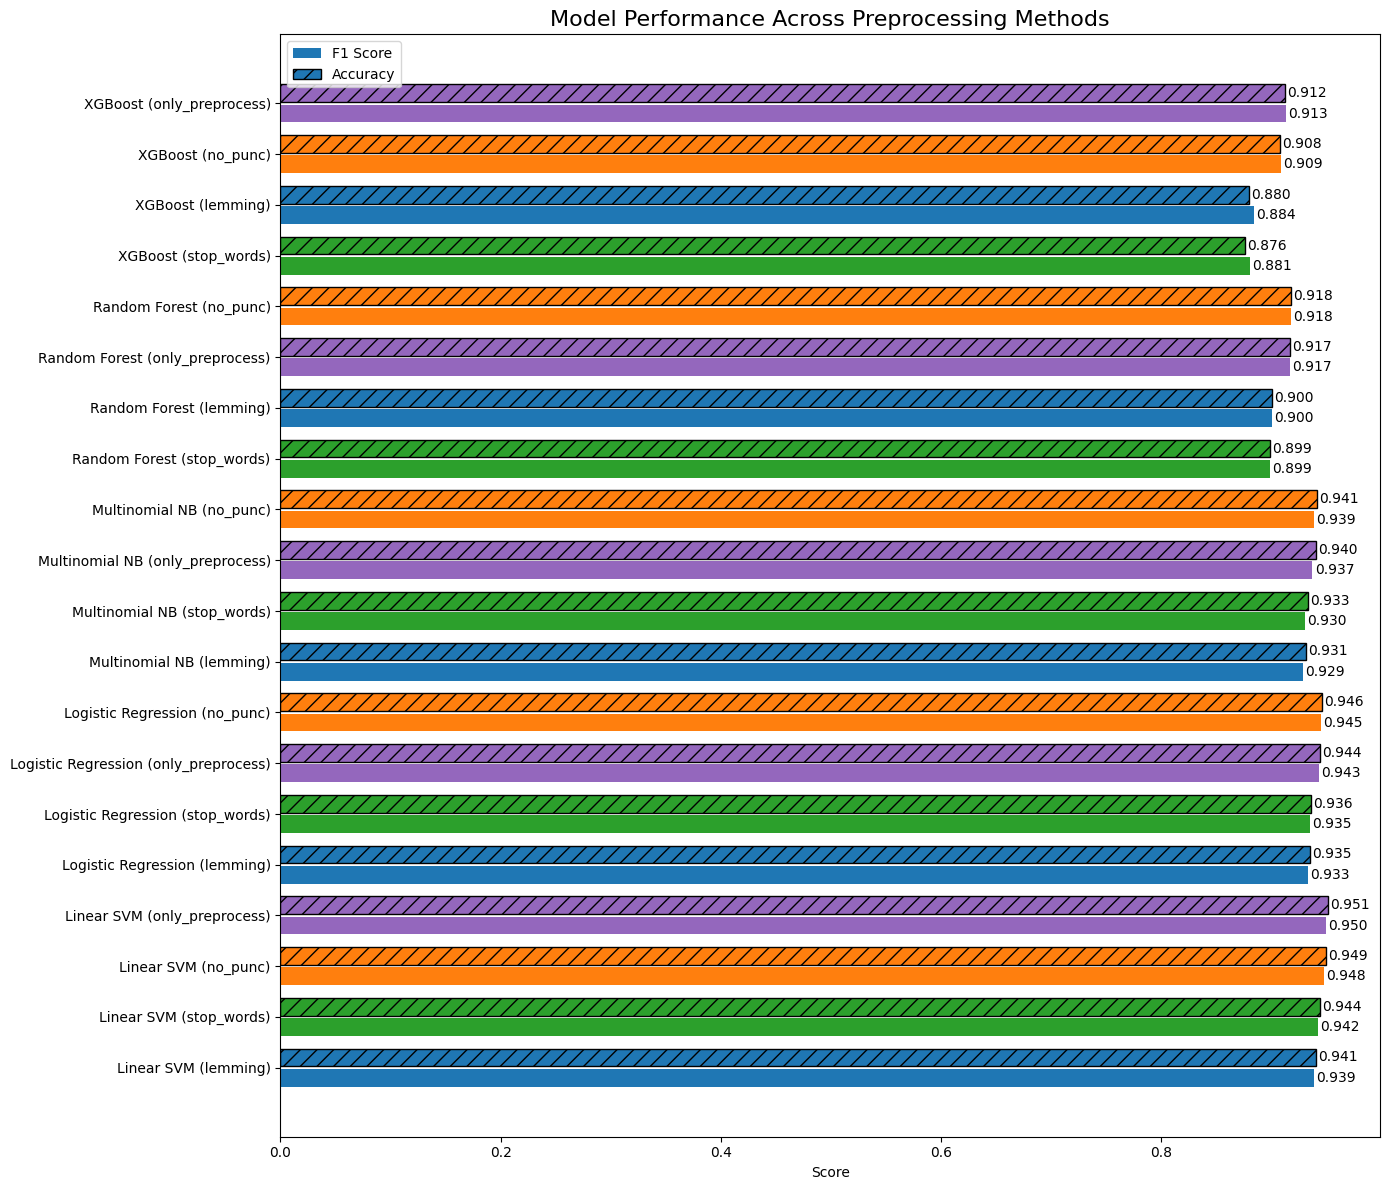

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load CSVs
df_lem = pd.read_csv(r"C:\Users\traik\Desktop\ML_Bootcamp\Week7\Project_Week7/results_lemming.csv")
df_np  = pd.read_csv(r"C:\Users\traik\Desktop\ML_Bootcamp\Week7\Project_Week7/results_no_punc.csv")
df_sw  = pd.read_csv(r"C:\Users\traik\Desktop\ML_Bootcamp\Week7\Project_Week7/results_only_stop_words.csv")
df_pre = pd.read_csv(r"C:\Users\traik\Desktop\ML_Bootcamp\Week7\Project_Week7/results_with_only_pre_process.csv")

# Label each preprocessing setting
df_lem["setting"] = "lemming"
df_np["setting"]  = "no_punc"
df_sw["setting"]  = "stop_words"
df_pre["setting"] = "only_preprocess"

# Combine datasets
df_all = pd.concat([df_lem, df_np, df_sw, df_pre], ignore_index=True)

# Shorten model names
df_all["model"] = df_all["model"].str.replace(" + TF-IDF", "", regex=False)

# Create clearer labels
df_all["label"] = df_all["model"] + " (" + df_all["setting"] + ")"

# Sort for readability
df_all = df_all.sort_values(["model", "f1_score"])

# Color mapping per preprocessing method
color_map = {
    "lemming": "#1f77b4",
    "no_punc": "#ff7f0e",
    "stop_words": "#2ca02c",
    "only_preprocess": "#9467bd"
}

colors = df_all["setting"].map(color_map)

# Prepare values
y_pos = np.arange(len(df_all))

plt.figure(figsize=(14, 12))

# F1 (solid)
plt.barh(y_pos - 0.2, df_all["f1_score"], height=0.35,
         color=colors, label="F1 Score")

# Accuracy (hatched)
plt.barh(y_pos + 0.2, df_all["accuracy"], height=0.35,
         color=colors, hatch="//", edgecolor="black",
         label="Accuracy")

# Labels
plt.yticks(y_pos, df_all["label"])
plt.xlabel("Score")
plt.title("Model Performance Across Preprocessing Methods", fontsize=16)
plt.legend()

# Add score labels at the end of bars
for i, v in enumerate(df_all["f1_score"]):
    plt.text(v + 0.002, i - 0.2, f"{v:.3f}", va="center")

for i, v in enumerate(df_all["accuracy"]):
    plt.text(v + 0.002, i + 0.2, f"{v:.3f}", va="center")

plt.tight_layout()
plt.show()


# Character-level TF-IDF + Linear SVC — Tuning Results

---

## 🔧 Model Pipeline
**TF-IDF (character-level) → Linear SVC**

- Analyzer: `char`
- Classifier: `LinearSVC(class_weight='balanced', max_iter=5000)`
- Sublinear TF scaling optional

---

## 🔍 Grid Search Parameter Space

**TF-IDF parameters**
- `ngram_range`: (2,5), (3,5), (3,6), (4,7), (5,8)
- `min_df`: 3, 5, 10
- `sublinear_tf`: True, False

**Linear SVC parameter**
- `C`: 0.5, 1.0, 2.0, 4.0

---

## ⭐ Best Parameters Found

- `analyzer = 'char'`
- `ngram_range = (2,5)`
- `min_df = 5`
- `sublinear_tf = True`
- `C = 0.5`

---

## 📊 Performance Comparison

| Metric     | Before Tuning | After Tuning |
|------------|---------------|--------------|
| Accuracy   | **0.9707**     | **0.9718**
| F1 Score   |  **0.9698**     | **0.9718**    |

**F1 Improvement:** +0.010

---

## 🎯 Takeaway
Grid search tuning of the character-level TF-IDF + Linear SVC pipeline delivers a **~1% improvement**, pushing the model into a **high-performance regime** with strong F1 and accuracy.


### Grid Search Parameter Space

| Component   | Parameter       | Values                                       |
|-------------|-----------------|-----------------------------------------------|
| TF-IDF      | ngram_range     | (2,5), (3,5), (3,6), (4,7), (5,8)             |
| TF-IDF      | min_df          | 3, 5, 10                                      |
| TF-IDF      | sublinear_tf    | True, False                                   |
| Linear SVC  | C               | 0.5, 1.0, 2.0, 4.0                            |


### Model Configurations

| Model               | Parameters |
|---------------------|------------|
| **Linear SVC**      | `LinearSVC(max_iter=5000, class_weight='balanced', random_state=42)` |
| **Logistic Regression** | `LogisticRegression(max_iter=2000, solver='lbfgs', class_weight='balanced', random_state=42)` |
| **Multinomial NB**  | `MultinomialNB(alpha=1.0)` |
| **Random Forest**   | - n_estimators=200<br>- max_depth=50<br>- max_features='sqrt'<br>- random_state=42<br>- n_jobs=-1 |
| **XGBoost**         | - n_estimators=200<br>- max_depth=6<br>- learning_rate=0.1<br>- subsample=0.8<br>- colsample_bytree=0.8<br>- use_label_encoder=False<br>- eval_metric='logloss'<br>- random_state=42<br>- n_jobs=-1 |


### Model Configurations

| Model               | Parameters |
|---------------------|------------|
| **Linear SVC**      | `max_iter=5000`, `class_weight='balanced'`, `random_state=42` |
| **Logistic Regression** | `max_iter=2000`, `lbfgs`, `class_weight='balanced'`, `random_state=42` |
| **Multinomial NB**  | `alpha=1.0` |
| **Random Forest**   | n_estimators=200<br>max_depth=50<br>max_features='sqrt'<br>n_jobs=-1 |
| **XGBoost**         | n_estimators=200<br>max_depth=6<br>eta=0.1<br>subsample=0.8<br>colsample_bytree=0.8<br>eval_metric='logloss'<br>n_jobs=-1 |


### Vectorizer Configurations

| Vectorizer              | Parameters |
|-------------------------|------------|
| **TF-IDF (word)**       | tokenizer=custom_tokenizer<br>lowercase=False<br>token_pattern=None<br>ngram_range=(1,2)<br>min_df=2<br>max_df=0.9 |
| **Bag-of-Words (BoW)**  | tokenizer=custom_tokenizer<br>lowercase=False<br>token_pattern=None<br>ngram_range=(1,2)<br>min_df=0.1<br>max_df=0.9 |
| **TF-IDF (char-level)** | analyzer=char<br>lowercase=False<br>sublinear_tf=True<br>ngram_range=(3,6)<br>min_df=2<br>max_df=0.9 |


### Preprocessing Enhancements

| Step                       | Details |
|----------------------------|---------|
| **Remove political entities** | political_names = ["trump", "obama", "clinton", "putin",<br>"democrats", "republicans", "gop", "senate", "congress"] |
| **Filter short headlines**    | remove headlines with **word count < 4** |
| **Improve punctuation normalization** | Custom function to unify quotes:<br><br>`normalize_quotes(text)` → converts “ ” „ ‟ ’ ‘ ‚ into standard ASCII `"` and `'` |


### Preprocessing Enhancements

| Step                       | Details |
|----------------------------|---------|
| **Remove political entities** | Remove the following names:<br>• trump<br>• obama<br>• clinton<br>• putin<br>• democrats<br>• republicans<br>• gop<br>• senate<br>• congress |
| **Filter short headlines** | Remove headlines with:<br>• fewer than **4 words** |
| **Normalize punctuation**  | Convert stylized quotes to standard ASCII:<br><br>• “ ” „ ‟ → "<br>• ’ ‘ ‚ → ' |
